In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import pearsonr
import scipy.stats as st


In [12]:
df_demo = pd.read_csv('../demo_clean.csv')

In [13]:
df_demo.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,12.0,1.0,60.0,unknown,2,45105.30,6,9
1,2304905,14.0,10.0,58.0,unknown,2,110860.30,6,9
2,1439522,10.0,4.0,32.0,unknown,2,52467.79,6,9
3,1562045,32.0,6.0,49.0,male,2,67454.65,3,6
4,5126305,24.0,1.0,33.0,female,2,103671.75,0,3


In [14]:
df_demo = df_demo.drop_duplicates()

In [15]:
df_demo = df_demo.dropna()

In [16]:
demo = df_demo.dropna(subset=['bal'])
demo.isnull().sum()
print(demo.shape)

(70326, 9)


In [17]:
print(demo.columns)

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [18]:
demo['clnt_tenure_yr'].unique()

array([ 12.,  14.,  10.,  32.,  24.,  60.,  30.,  16.,   8.,   6.,  20.,
        22.,  26.,  28.,  38.,  36.,  50.,  46.,  42.,  34.,  18.,  54.,
        48.,  40.,  56.,  15.,  44.,  58.,  92.,  52.,  64.,  66.,  70.,
         4.,  76.,  62.,  96.,  23.,  31.,  68.,   7.,  72.,  94.,  98.,
        74.,  78.,  80.,  84.,  88.,  86.,  47., 100.,  39.,  82.,  90.])

In [19]:
demo['clnt_tenure_mnth'].unique()

array([ 1., 10.,  4.,  6., 11.,  9.,  3.,  7.,  2.,  5.,  8.,  0.])

In [20]:
demo['clnt_age'].unique()

array([60., 58., 32., 49., 33., 30., 68., 54., 34., 52., 62., 36., 74.,
       31., 26., 42., 55., 38., 63., 48., 66., 65., 51., 46., 64., 23.,
       56., 76., 28., 40., 25., 27., 39., 44., 35., 19., 22., 61., 72.,
       45., 18., 78., 50., 29., 57., 70., 53., 69., 43., 84., 47., 71.,
       59., 21., 83., 67., 20., 75., 24., 79., 41., 80., 73., 87., 86.,
       37., 85., 82., 77., 88., 96., 81., 94., 89., 92., 90., 93., 91.])

In [21]:
demo_numerical = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
demo_categorical = ['gendr', 'client_id']
demo_numerical, demo_categorical


(['clnt_tenure_yr',
  'clnt_tenure_mnth',
  'clnt_age',
  'num_accts',
  'bal',
  'calls_6_mnth',
  'logons_6_mnth'],
 ['gendr', 'client_id'])

In [22]:
demo.select_dtypes("object").columns

Index(['gendr'], dtype='object')

In [23]:
demo.select_dtypes("object").nunique().sort_values(ascending=False)

gendr    3
dtype: int64

In [24]:
# Frequency table for ''
frequency_table = demo['clnt_age'].value_counts()

# Calculating the proportion of each unique value in the 'clnt_age'
proportion_table = demo['clnt_age'].value_counts(normalize=True)

frequency_table, proportion_table

(clnt_age
 58.0    2406
 30.0    2374
 52.0    2373
 54.0    2365
 28.0    2353
         ... 
 89.0      14
 94.0       8
 91.0       6
 96.0       3
 93.0       3
 Name: count, Length: 78, dtype: int64,
 clnt_age
 58.0    0.034212
 30.0    0.033757
 52.0    0.033743
 54.0    0.033629
 28.0    0.033458
           ...   
 89.0    0.000199
 94.0    0.000114
 91.0    0.000085
 96.0    0.000043
 93.0    0.000043
 Name: proportion, Length: 78, dtype: float64)

In [25]:
frequency_table = demo['clnt_tenure_yr'].value_counts()


proportion_table = demo['clnt_tenure_mnth'].value_counts(normalize=True)

frequency_table, proportion_table

(clnt_tenure_yr
 12.0     7057
 10.0     6900
 14.0     4926
 8.0      4628
 30.0     4552
 16.0     4043
 28.0     3641
 24.0     3628
 26.0     3603
 18.0     3354
 22.0     2908
 20.0     2773
 32.0     2707
 42.0     2243
 40.0     1574
 44.0     1482
 34.0     1371
 46.0     1265
 36.0     1205
 38.0     1146
 48.0      843
 52.0      660
 54.0      632
 56.0      507
 50.0      481
 6.0       442
 58.0      309
 60.0      303
 66.0      206
 64.0      191
 68.0      175
 62.0      166
 70.0      102
 4.0        79
 72.0       36
 74.0       35
 76.0       33
 15.0       17
 96.0       16
 23.0       10
 78.0        9
 80.0        9
 31.0        8
 100.0       8
 47.0        6
 84.0        6
 94.0        6
 86.0        6
 92.0        5
 98.0        4
 88.0        3
 39.0        3
 7.0         2
 82.0        1
 90.0        1
 Name: count, dtype: int64,
 clnt_tenure_mnth
 10.0    0.167406
 11.0    0.122288
 0.0     0.098285
 1.0     0.096536
 9.0     0.075932
 8.0     0.066135
 6.0 

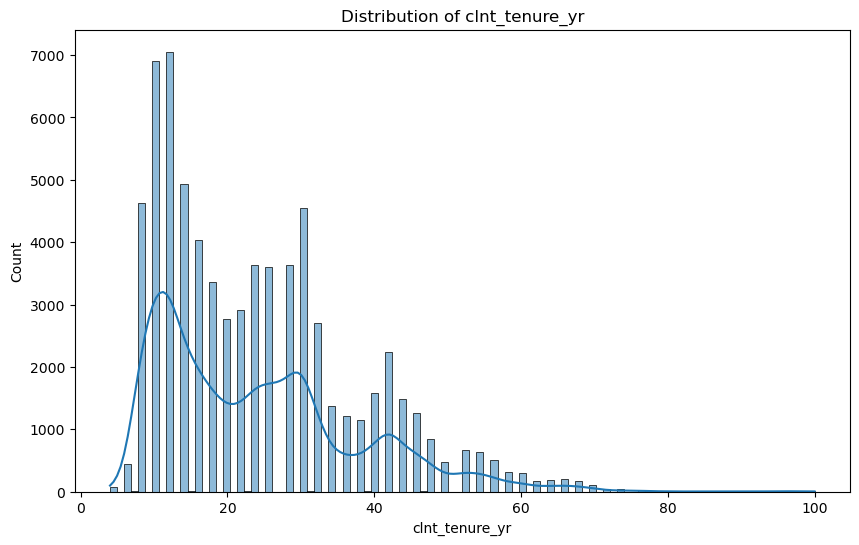

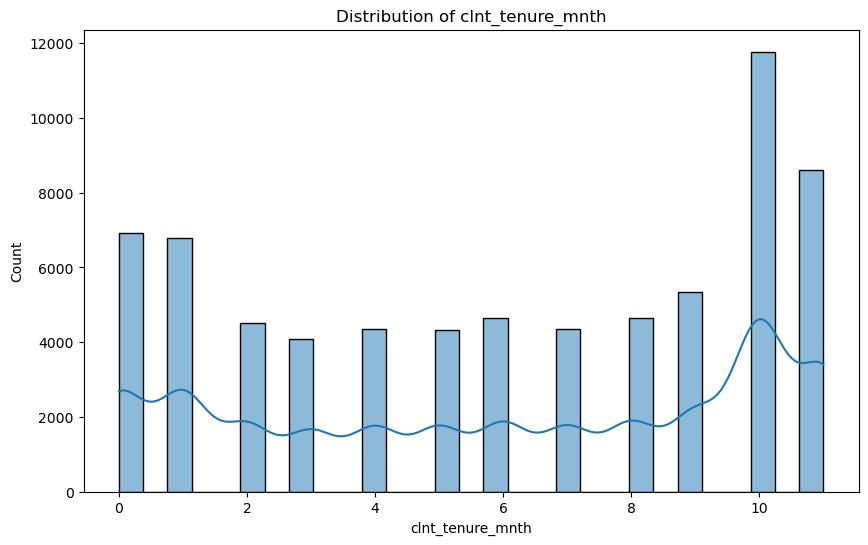

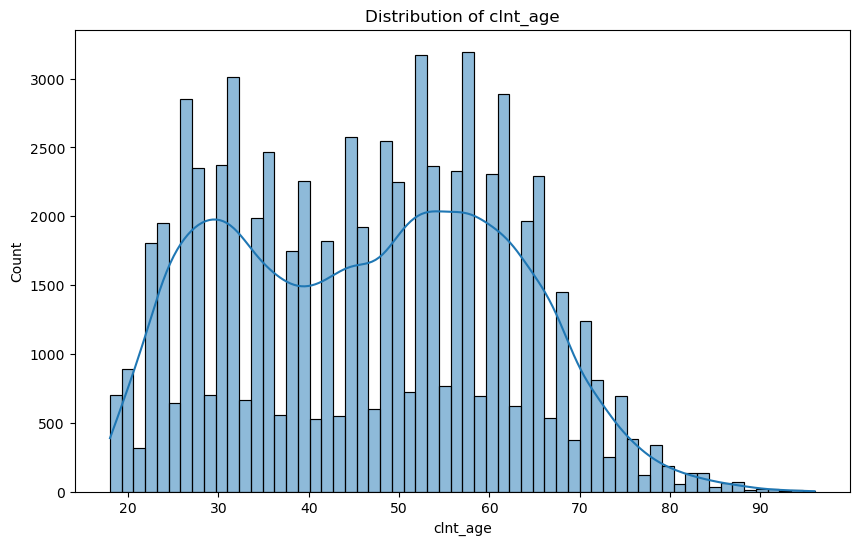

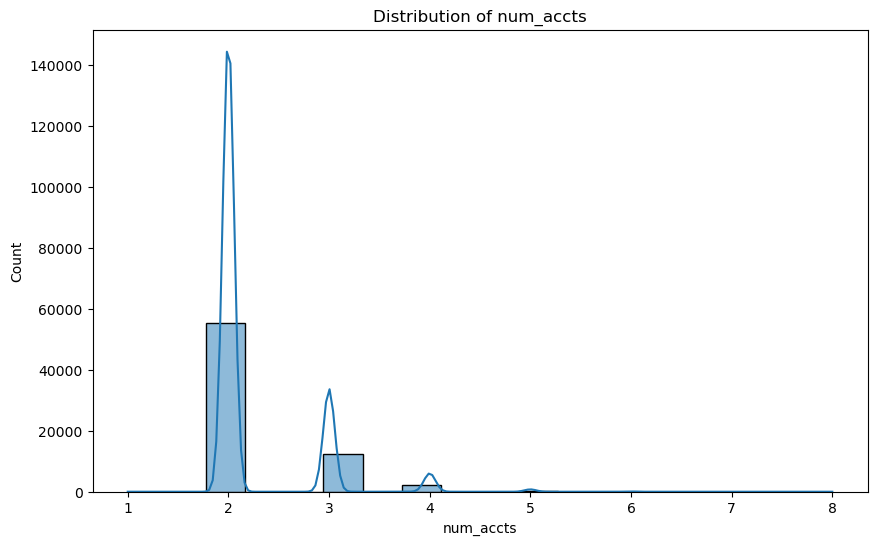

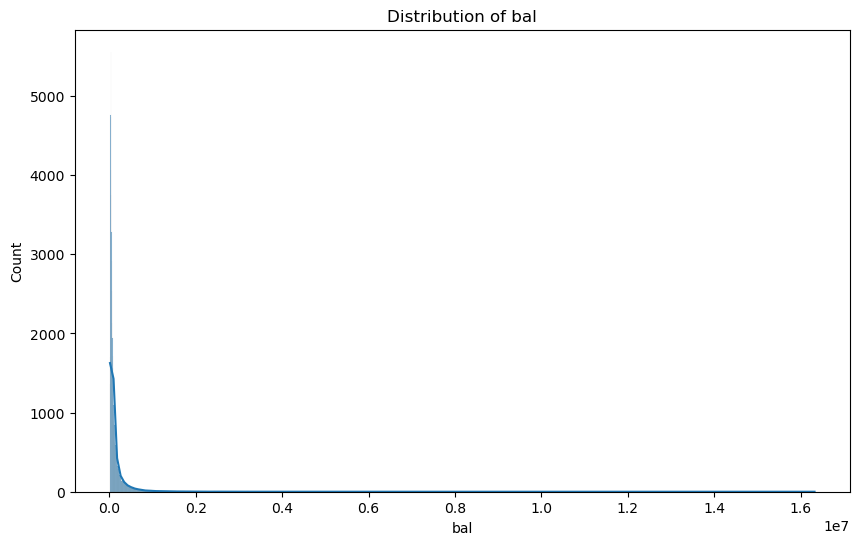

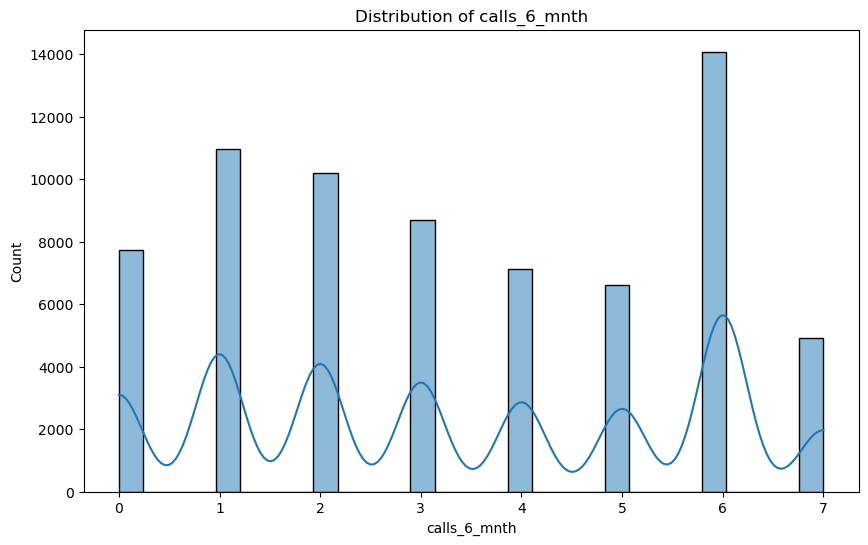

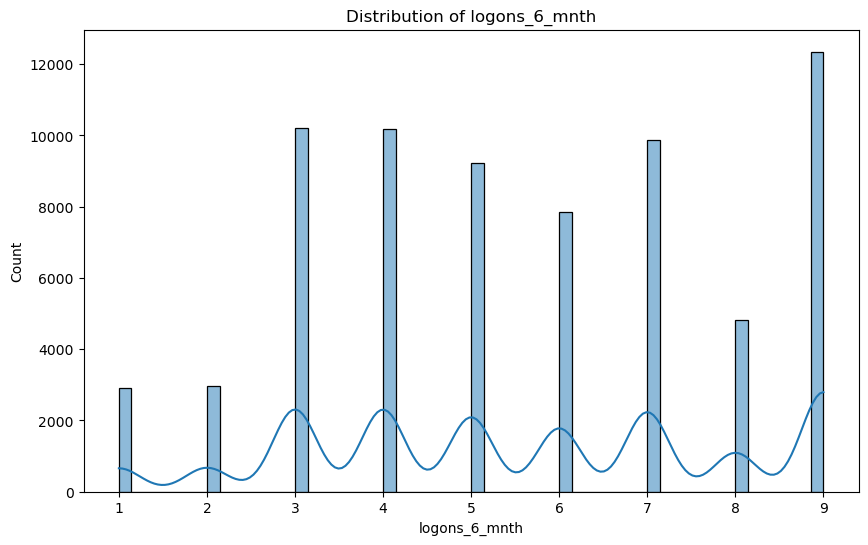

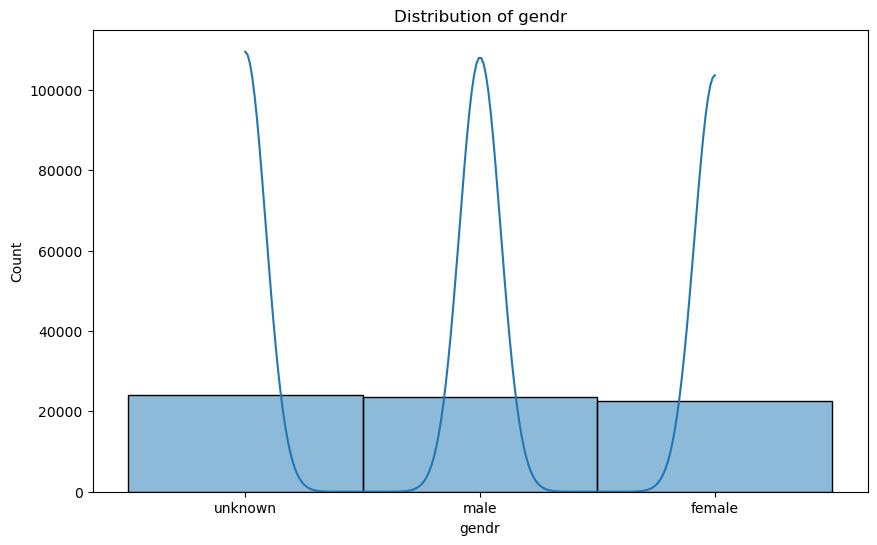

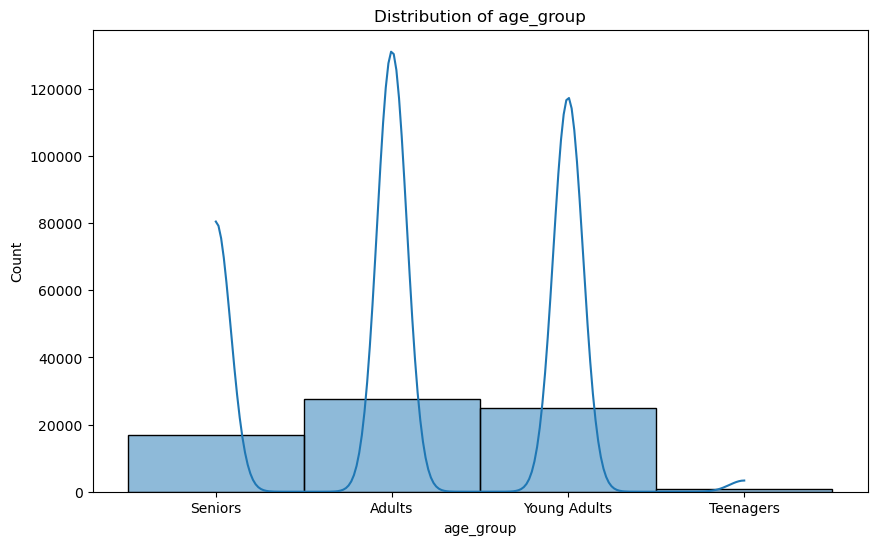

In [26]:
#  plot_distributions_numerical function

def plot_distributions_numerical(df, columns):
    """
    Plot distributions for numerical columns in the dataframe
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data
    columns (list): List of column names to plot
    """
    for col in columns:
        if col in df.columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.show()


bins = [12, 19, 39, 59, 100]
labels = ['Teenagers', 'Young Adults', 'Adults', 'Seniors']
demo['age_group'] = pd.cut(df_demo['clnt_age'], bins=bins, labels=labels, include_lowest=True).astype('object')
plot_distributions_numerical(demo, demo_numerical + ['gendr', 'age_group'])

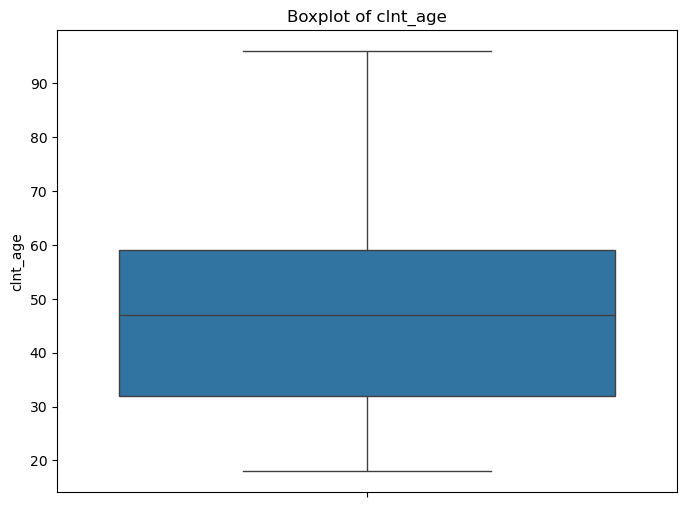

In [27]:

# Import the necessary libraries
# If plot_boxplot is from seaborn:
import seaborn as sns

# If you're using your own function, define it first:
def plot_boxplot(demo, column):
    """
    Create a boxplot for the specified column in the dataframe
    
    Parameters:
    data (DataFrame): The dataframe containing the data
    column (str): The column name to plot
    """
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=demo[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


plot_boxplot(demo, 'clnt_age')

In [28]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70326 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70326 non-null  int64  
 1   clnt_tenure_yr    70326 non-null  float64
 2   clnt_tenure_mnth  70326 non-null  float64
 3   clnt_age          70326 non-null  float64
 4   gendr             70326 non-null  object 
 5   num_accts         70326 non-null  int64  
 6   bal               70326 non-null  float64
 7   calls_6_mnth      70326 non-null  int64  
 8   logons_6_mnth     70326 non-null  int64  
 9   age_group         70326 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 5.9+ MB
